### 1. Introduction to Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered "unsinkable" RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

This dataset has been referred from Kaggle: https://www.kaggle.com/c/titanic/data

### 2. Goal of the Project

* Understand the Dataset & clean it and perfrom exploratory analysis. 
* Dataset exploration using various types of data visualization. 
* Feature Selection 
* Build classification model to predict weather the passenger survives or not. 
* Use differnt classification model to check the accuracy. 
* Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms. 

### 3. Import Libraries
that will be used in the notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os

warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### 4. Reading Data Set
reading both train and test dataset. 

In [2]:
train_df = pd.read_csv('train.csv')
test_df_actual = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 5. Basic Analysis

In [4]:
#make a copy of test data we'll use the actual at the end
test_df= test_df_actual.copy()

In [5]:
# how many columns and rows are in the train data
print(f"There are {train_df.shape[0]} number of rows and {train_df.shape[1]} number of columns.")

There are 891 number of rows and 12 number of columns.


In [6]:
# name of columns
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# data type of each column
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# info about columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* From the above observation we can see there are some null values in few columns.
* Let see how many exact null values in which columns

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Numerical data Statistic Summary

In [11]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Categorical Data Statistic Summary

In [12]:
train_df.describe(include = 'O').T

,count,unique,top,freq
Name,891,891,"Panula, Master. Eino Viljami",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


### 6. Data Cleaning and preprocessing 

* From the above observation we can see that we have total 891 number of rows 
* In the age column we have 177 null values and in the embarked column we have 2 null values.
* But in cabin we have 687 null values.

* We can remove missing values by filling the age with the mean of age columns from both train and test data
* And Embarked column with the mode of embarked column in the train data
* But it's not a good idea to fill a column with mean or mode which has more then 80 % null values. 
* So we'll remove cabin column from both train and test data

In [13]:
# fill age with mean of age columns and convert the datatype into integer
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [14]:
#fill fare of test value with mean of fare
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [15]:
# fill Embarked with mode of Embarked columns
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [16]:
# remove cabin column and 
train_df.drop(['Cabin'], axis = 1, inplace = True)
test_df.drop(['Cabin'], axis = 1, inplace = True)

* Also remove passanger id, Name and Ticker because these are not gonna help us in exploration and prediction
* Since Name, Ticket, and PassengerId contains unique data, these columns will be removed.

In [17]:
train_df.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)
test_df.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

In [18]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


### 7. Exploratory Analysis

#### 7.1 Survived Distribution

In [19]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

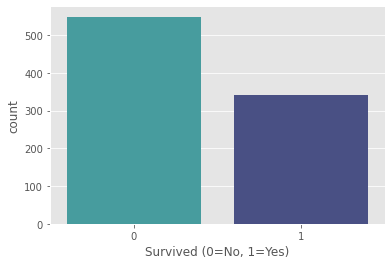

In [20]:
sns.countplot(x="Survived", data=train_df, palette="mako_r")
plt.xlabel('Survived (0=No, 1=Yes)')
plt.show()

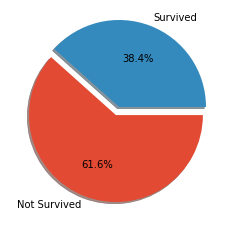

In [21]:
plt.pie(train_df['Survived'].value_counts(), labels=['Not Survived', 'Survived'], counterclock=False, shadow=True, 
        explode=[0,0.1], autopct='%1.1f%%', radius=1)
plt.show()

It can be seen that most passengers are not survived.

#### 7.2 Gender Distribution

In [22]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
train_df.Sex.value_counts(normalize = True)*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

* Female Percentage: 35.24%
* Male Percentage: 64.75%

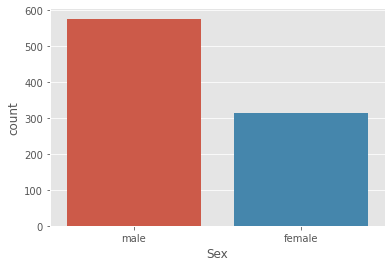

In [24]:
sns.countplot(x='Sex', data=train_df)
plt.xlabel("Sex")
plt.show()

* The percentage of male passengers is higher than female passengers.

#### 7.3 Age Distribution

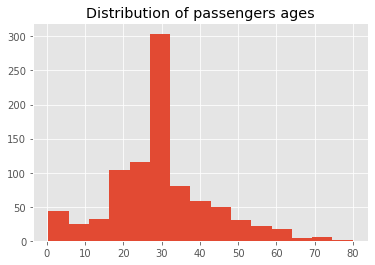

In [25]:
plt.hist(train_df['Age'], bins=15);
plt.title('Distribution of passengers ages')
plt.show()

* The average age is approximately 30
* maximum age is near 80
* And minimum is 0.42 years old. it means may be some are kids and having age less than year.

#### 7.4 Survived Distribution based on Gender

In [26]:
pd.crosstab(train_df.Sex,train_df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


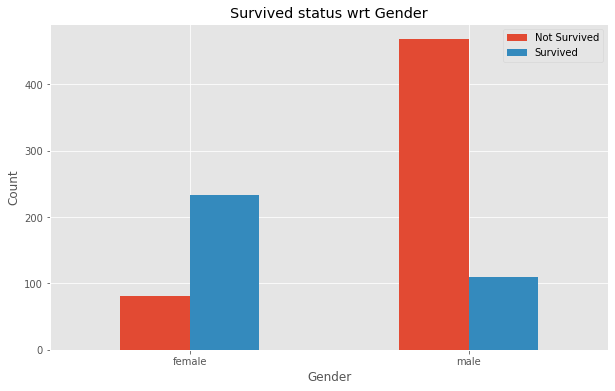

In [27]:
pd.crosstab(train_df.Sex,train_df.Survived).plot(kind="bar",figsize=(10,6))
plt.title('Survived status wrt Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(["Not Survived", "Survived"])
plt.ylabel('Count')
plt.show()



* The number of female passengers that are survived is higher than male not survived.


#### 7.5 Survived Distribution based on Age

* Let's create the age group to better understand this part.

In [28]:
train_df['age_group'] = pd.qcut(train_df['Age'], q=10, precision = 0, duplicates = 'drop')

In [29]:
train_df['age_group'].value_counts()

(28.0, 30.0]    199
(-1.0, 16.0]    100
(20.0, 24.0]     98
(32.0, 38.0]     89
(47.0, 80.0]     89
(38.0, 47.0]     88
(24.0, 28.0]     85
(16.0, 20.0]     79
(30.0, 32.0]     64
Name: age_group, dtype: int64

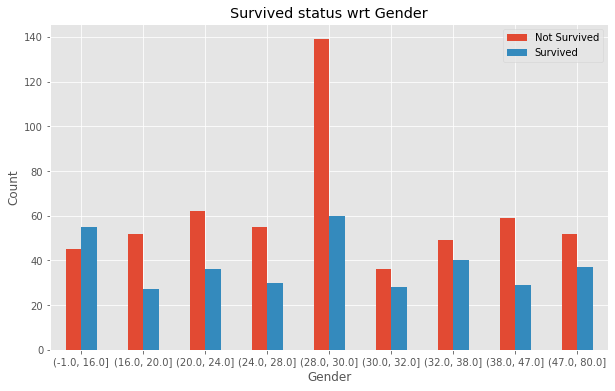

In [30]:
pd.crosstab(train_df.age_group,train_df.Survived).plot(kind="bar",figsize=(10,6))
plt.title('Survived status wrt Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(["Not Survived", "Survived"])
plt.ylabel('Count')
plt.show()

* It can be seen that the majority of not survived passengers are between 16-30 y.o, quite similar to survived passengers in the same age range
* Mostly survived is between 0 to 16 years old

#### 7.6 Passenger Class based on Gender

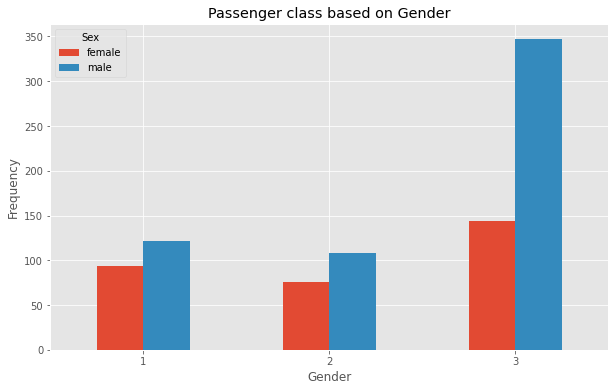

In [31]:
pd.crosstab(train_df.Pclass,train_df.Sex).plot(kind="bar",figsize=(10,6))
plt.title('Passenger class based on Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

* Most of passengers from both genders prefer to choose 3rd class rather than other classes.

In [32]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_group
0,0,3,male,22.000000,1,0,7.2500,S,"(20.0, 24.0]"
1,1,1,female,38.000000,1,0,71.2833,C,"(32.0, 38.0]"
2,1,3,female,26.000000,0,0,7.9250,S,"(24.0, 28.0]"
3,1,1,female,35.000000,1,0,53.1000,S,"(32.0, 38.0]"
4,0,3,male,35.000000,0,0,8.0500,S,"(32.0, 38.0]"
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,"(24.0, 28.0]"
887,1,1,female,19.000000,0,0,30.0000,S,"(16.0, 20.0]"
888,0,3,female,29.699118,1,2,23.4500,S,"(28.0, 30.0]"
889,1,1,male,26.000000,0,0,30.0000,C,"(24.0, 28.0]"


#### 7.7 Survived Distribution based Port of Embarkation

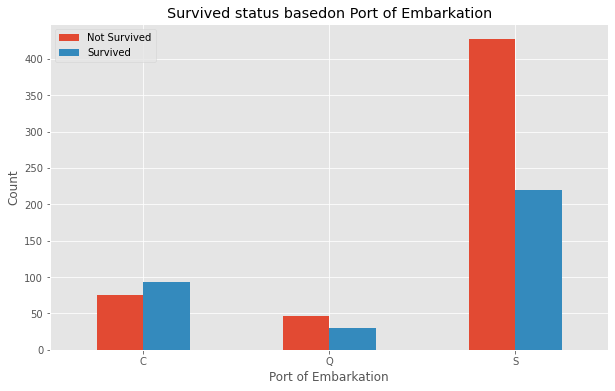

In [33]:
pd.crosstab(train_df.Embarked,train_df.Survived).plot(kind="bar",figsize=(10,6))
plt.title('Survived status basedon Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.xticks(rotation=0)
plt.legend(["Not Survived", "Survived"])
plt.ylabel('Count')
plt.show()

* C = Cherbourg, Q = Queenstown, S = Southampton
* Mosly survived and died people on Southampton port

#### 7.8 Distribution of Numerical Value

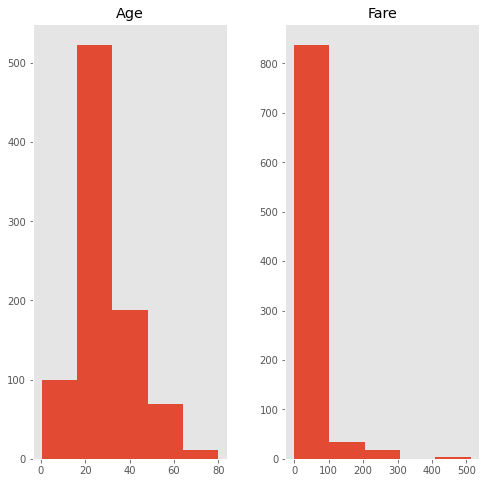

In [34]:
train_df[['Age', 'Fare']].hist(grid=False, figsize=(8, 8), bins=5)
plt.show()

#### 7.9 Correlation 

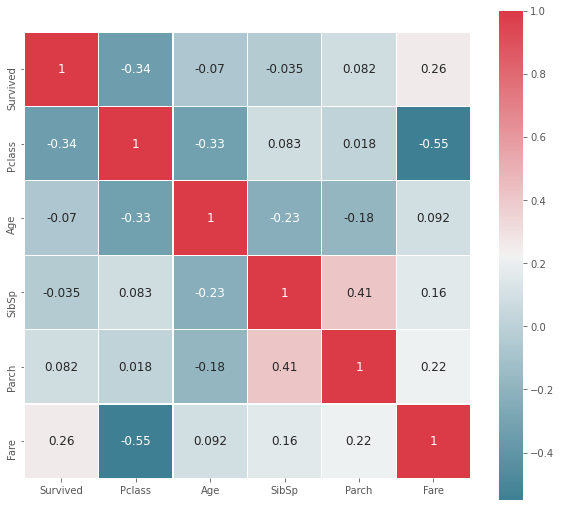

In [35]:
 _ , ax = plt.subplots(figsize =(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(
        train_df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 },
        ax= ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.show()

### 8 Feature Engineering

The Feature Engineering method that used is one-hot encoding, which is transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction.

In [36]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Pclass'])
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Pclass'])

In [37]:
# drop age group colum
train_df = train_df.drop(['age_group'], axis = 1)

### 9 Data Preparation

#### 9.1 Splitting the dataset into 80% training, 20% test

In [38]:
X = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### 9.2 Over Sampling 

* Since the number of not survived passengers is more than survived passengers, oversampling is carried out to avoid overfitting.
* The number of Not survived passangers are more than survived. So there is a chance that model will show the biasness.
* That's why we are gonna handle imbalance data. * 

In [39]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

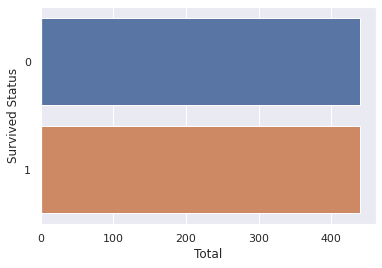

In [40]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=test_df)
plt.ylabel('Survived Status')
plt.xlabel('Total')
plt.show()

### 10. Model Building

The machine learning models used in this project are:

* Logistic Regression
* SVC
* K Neighbors Classifier
* Decision Tree
* Random Forest
* Gradient Boosting


#### 10.1 Logistic Regression

In the regression model , The model which is used for classification is logitic regression model.
we're going to implement it. And let see the accuracy Score

In [42]:
LRclassifier = LogisticRegression(solver='liblinear', max_iter=100)
LRclassifier.fit(x_train, y_train)

y_pred = LRclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
LRAcc = accuracy_score(y_pred,y_test)

print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       110
           1       0.72      0.80      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179

[[89 21]
 [14 55]]
Logistic regression accuracy: 80.45%


#### 10.2 Decision tree Classifier 

* The second model which i'm going to use is Decision tree Classifier. 
* I have randomly selected the max_leaf_nodes attribute to 10. 
* Let's see the accuracy. 

In [43]:
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=10)
DTclassifier.fit(x_train, y_train)

y_pred = DTclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
DTAcc = accuracy_score(y_pred,y_test)

print('Decision tree accuracy: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

[[96 14]
 [17 52]]
Decision tree accuracy: 82.68%


Let's check the accuracy of first 50 max_leaf_nodes and find the maximum accuracy

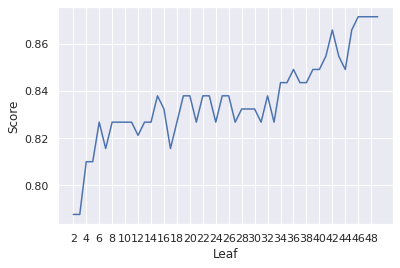

DT Acc Max: 87.15%


In [44]:


scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(x_train, y_train)
    scoreListDT.append(DTclassifier.score(x_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,2))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max: {:.2f}%".format(DTAccMax*100))



The above graph shows the maximum accuracy is 87.15% and the max_leaf_nodes attribute's value is 6.

#### 10.3 Support Vector Classifier

Now lets implement Support Vector Classifier to test the classification results and check the accuracy.

In [45]:
SVCclassifier = SVC(kernel='linear')
SVCclassifier.fit(x_train, y_train)

y_pred = SVCclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
SVCAcc = accuracy_score(y_pred,y_test)

print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

[[92 18]
 [20 49]]
SVC accuracy: 78.77%


#### 10.4 K Neighbors Classifier

* KNN is very famous machine learning model. It can be use for both classification and regression problem. 
* Let's implement it and test the accuracy.
* I have randomly set n_neighbors to 90.

In [46]:
KNclassifier = KNeighborsClassifier(n_neighbors=90)
KNclassifier.fit(x_train, y_train)

y_pred = KNclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
KNAcc = accuracy_score(y_pred,y_test)

print('K Neighbors Classifier accuracy: {:.2f}%'.format(KNAcc*100))


              precision    recall  f1-score   support

           0       0.80      0.77      0.79       110
           1       0.66      0.70      0.68        69

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.75      0.74      0.74       179

[[85 25]
 [21 48]]
K Neighbors Classifier accuracy: 74.30%


Let's test first 90 n_neighbors and see the maximum accuracy

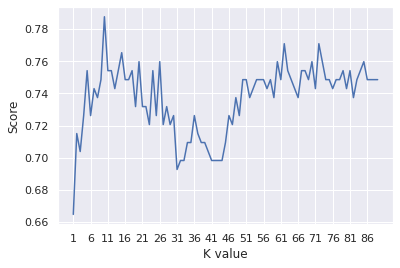

KNN Acc Max: 78.77%


In [47]:
scoreListknn = []
for i in range(1,90):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(x_train, y_train)
    scoreListknn.append(KNclassifier.score(x_test, y_test))
    
plt.plot(range(1,90), scoreListknn)
plt.xticks(np.arange(1,90,5))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max: {:.2f}%".format(KNAccMax*100))

#### 10.5 Random Forest Classifier

* The next Model is Random Forest Classifier. it's also a good algorithm for classification. 
* I have randomly selected the max_leaf_nodes to 10. 
* let's see the accuracy. 

In [48]:
RFclassifier = RandomForestClassifier(max_leaf_nodes=10)
RFclassifier.fit(x_train, y_train)

y_pred = RFclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

[[96 14]
 [20 49]]
Random Forest accuracy is: 81.01%


* Now I'm going to iterate max_leaf_nodes  through the first 55 values. 
* Let's What's the highest accuracy of Random Forest Classifier while looping

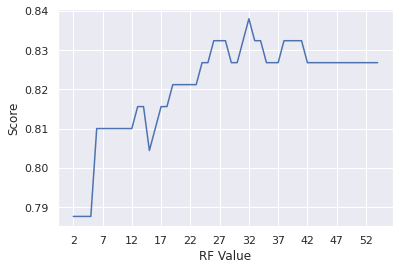

RF Acc Max: 83.80%


In [49]:
scoreListRF = []
for i in range(2,55):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(x_train, y_train)
    scoreListRF.append(RFclassifier.score(x_test, y_test))
    
plt.plot(range(2,55), scoreListRF)
plt.xticks(np.arange(2,55,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max: {:.2f}%".format(RFAccMax*100))

#### 10.6 Gradient Bossting Classifier

In [50]:
GBclassifier = GradientBoostingClassifier(n_estimators=400, max_depth=3, max_leaf_nodes=10)
GBclassifier.fit(x_train, y_train)

y_pred = GBclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy is: {:.2f}%'.format(GBAcc*100))



              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

[[98 12]
 [17 52]]
Gradient Boosting accuracy is: 83.80%


### 11 Model Comparison

In [51]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'SVC', 'K Neighbors Classifier', 'Random Forest Classifier'
                                 , 'Gradient Boosting'], 
                        'Accuracy': [LRAcc*100, DTAccMax*100, SVCAcc*100 , KNAccMax*100, RFAccMax*100,GBAcc*100]})
compare

,Model,Accuracy
0,Logistic Regression,80.446927
1,Decision Tree,87.150838
2,SVC,78.770950
3,K Neighbors Classifier,78.770950
4,Random Forest Classifier,83.798883
5,Gradient Boosting,83.798883


* Some models can achieve up to 80% accuracy
* Decision Tree has highest Accuracy

#### Now Let's test Our Acutal test data on a model having highest Accuracy

In [52]:
GBclassifier = GradientBoostingClassifier(n_estimators=400, max_depth=3, max_leaf_nodes=48)
GBclassifier.fit(x_train, y_train)

prediction = GBclassifier.predict(test_df)

In [53]:
output = pd.DataFrame({'PassengerId': test_df_actual['PassengerId'] , 'Survived': prediction})

In [54]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
